In [48]:
__version__ = '0.3'
__author__  = "Robert Matern (r.matern@stud.uni-hannover.de)"
__date__    = ''
__url__     = ''
__copyright__ = "(C) 2015 Robert Matern"

#Beispieldaten Nr. 10

In [49]:
%run Parameter.ipynb
%run DynamicProgramm.ipynb

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
# Produkte
products = Product(3)

# Ressourcen
resources = Resource(1)

#Kapazität
capacities = Capacity(resources)
capacities[1] = 10
#capacities[2] = 10
#capacities[3] = 10
#capacities[4] = 10
#capacities[5] = 5
#capacities[6] = 5
#capacities[7] = 5
#capacities[8] = 5
#capacities[9] = 5
#capacities[10] = 5
#capacities[11] = 5
#capacities[12] = 5
#capacities[13] = 5

# Ressourcenverbrauch
consumtions = Consumption(products, resources)
consumtions[1] = [0,1]#,0,1,0]#,1,1,0,1,1,1,1,0,1]
consumtions[2] = [0,1]#,1,0,1]#,1,0,0,1,1,0,1,1,0]
consumtions[3] = [0,1]#,1,1,0]#,0]#,1,1,0,0,0,1,0,0]
#consumtions[4] = [0,1,1,0,1]#,1]#,1,0,1,1,0,0,0,0]
#consumtions[5] = [0,0,1,1,0]#,0]#,0,0,1,1,1,1,0,1]

# Erträge
revenues = Revenue(products)
revenues[1] = 200
revenues[2] = 100
revenues[3] = 300
#revenues[4] = 220
#revenues[5] = 150

# Buchungshorizont
times = Time(12)

# Wahrscheinlichkeiten
probs = Prob(products, times)
#import random as rd
#for t in range(len(times)-1):
#    random = 0
#    for i in products[1:]:
#        i_random = rd.uniform(random, 10.0)
#        probs[i][t] = i_random/10.0
#        random = i_random
# WICHTIG: DIE WAHRSCHEINLICHKEITEN SIND IN DER ZEIT AUFWÄRTS SORTIERT (t=0,1,...,T).
probs[1] = [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
probs[2] = [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
probs[3] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
#probs[4] = [0.0, 0.1, 0.1, 0.0, 0.6, 0.1, 0.2, 0.1, 0.1, 0.1, 0]
#probs[5] = [0.1, 0.1, 0.2, 0.1, 0.1, 0.0, 0.2, 0.2, 0.2, 0.1, 0]

# Gegenwahrscheinlichkeiten
against_probs = Against_Prob(probs)
probs[0] = against_probs

# Systemzustände
conditions = Condition(capacities, resources, times)

0:00:00.001243


In [52]:
import datetime
a = datetime.datetime.now()
print DP(solutions, conditions, products, resources, capacities, consumtions, times)
print datetime.datetime.now()-a

2200.0
0:00:00.053672


In [53]:
# Erstellung der Struktur als NetworkX-Graph
graph = Structure(solutions, products, consumtions, revenues, probs)

# Ermittlung der besten Politik (Dijkstra Algorithmus)
best_politic = Best_Politic(graph, times, products)

Bei der Bestimmung der optimalen Politik zum Zeitpunkt t wird davon ausgegangen, dass alle Anfragetypen eintreffen. 

Zum Zeitpunkt 12 mit einer Kapazität von [10] ist die optimale Politik:
Annahme des Auftrags 3
Der Ertrag r[j] abzgl. Opportunitätskosten OC[j,c,t] beträgt: 200.0 

Zum Zeitpunkt 11 mit einer Kapazität von [9] ist die optimale Politik:
Annahme des Auftrags 3
Der Ertrag r[j] abzgl. Opportunitätskosten OC[j,c,t] beträgt: 200.0 

Zum Zeitpunkt 10 mit einer Kapazität von [8] ist die optimale Politik:
Annahme des Auftrags 3
Der Ertrag r[j] abzgl. Opportunitätskosten OC[j,c,t] beträgt: 200.0 

Zum Zeitpunkt 9 mit einer Kapazität von [7] ist die optimale Politik:
Annahme des Auftrags 3
Der Ertrag r[j] abzgl. Opportunitätskosten OC[j,c,t] beträgt: 200.0 

Zum Zeitpunkt 8 mit einer Kapazität von [6] ist die optimale Politik:
Annahme des Auftrags 2
Der Ertrag r[j] abzgl. Opportunitätskosten OC[j,c,t] beträgt: 0.0 

Zum Zeitpunkt 7 mit einer Kapazität von [5] ist die optimale Poli

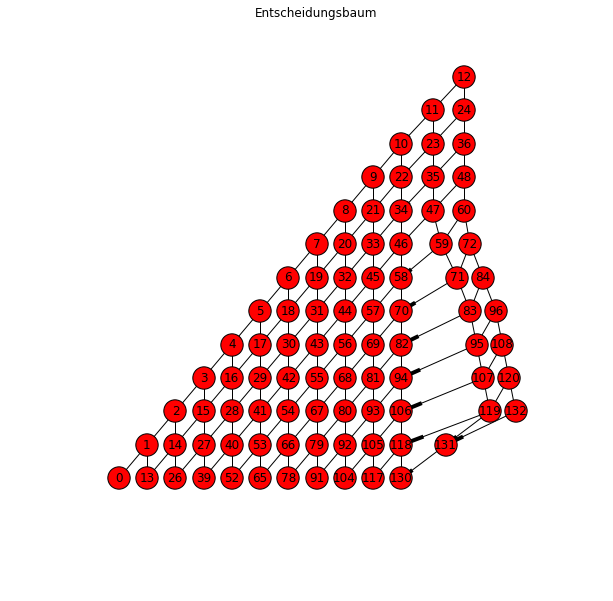

In [54]:
Drawing(graph, size_x=10, size_y=10)